In [1]:
import matplotlib.pyplot as plt
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)
#  a hack to hide code from cell: https://github.com/damianavila/RISE/issues/32    

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# CS5010 Artificial Intelligence Principles
### Lecture 11 Uncertainty 2
#### Probabilistic Inference 

Lei Fang

University of St Andrews

# Last time


* Random variable and its distribution

$$P(X) >0\;\;  \text{and} \;\;\sum_x P(X=x)=1$$

* We can have multiple random variables and their joint distribution (still a distribution)

$$P(X_1, X_2, \ldots, X_n) >0\;\;  \text{and}\\ \;\;\sum_{x_1}\sum_{x_2} \ldots \sum_{x_n} P(X_1=x_1, X_2=x_2, \ldots, X_n=x_n)=1$$

## Two rules 

Sum rule: $$P(X=x) = \sum_{y} P(X=x, Y=y);$$

Product rule: $$P(X, Y) = P(X) P(Y|X) = P(Y)P(X|Y)$$

## Conditional probability 

Based on the product rule, we have 

$$P(X|Y) = \frac{P(X, Y)}{P(Y)}$$

# This time

* Probabilistic inference using joint distribution and the two rules
* Baye's rule
* Examples of probabilistic inference
  * Concept learning 

# Probabilistic inference by joint distribution

Given two coins with different probabilities of head turning up: 
  * Coin 1 is a fair coin $p= 0.5$
  * Coin 2 is bent with $p=0.2$

Your friend randomly pick one coin (which you do not know) and toss it 2 times and record the results, $$Y_1 \in \{head,tail\},\;\; Y_2\in \{head, tail\}.$$ 

Was the fair coin used or not given the following observations?
  * $Y_1=h, Y_2=h$
  * $Y_1=t, Y_2=t$
  * $Y_1=t$

### Step 1, figure out the random variables 


Firstly, identify the random variables $$C,\; Y_1,\; Y_2$$ 
  * $C= 1,2$ denote which coin has been used 
  * $Y_1, Y_2$ are the tossing outcomes

### Step 2, figure out the joint distribution

The joint distrution $P(C, Y_1, Y_2)$ is over $2\times 2\times 2$ possible combinations
e.g $P(C=1, Y_1 =head, Y_2=head)$ 
<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/threedbox.png" width = "600" height="600"/></center>
  
  * We need to specify the $2\times 2\times 2$ entries  

  

  * Due to product rule, we have
  $$P(C=c, Y_1=y_1, Y_2=y_2) = P(C=c)P(Y_1=y_1, Y_2=y_2|C=c)$$
  * As the two tosses are independent, we have 
  $$P(Y_1, Y_2|C=c)= P(Y_1|C=c)P(Y_2|C=c)$$
    * it is called **conditional independence**: condition on knowing the coin choise, the two tosses are independent 

  * then we can populate the joint distribution table e.g. $$P(C=1, Y_1=t, Y_2=t) = P(C=1) \times P(Y_1=t|C=1)\times P(Y_2=t|C=1) = 0.5 *0.5*0.5$$ $$\vdots$$ $$P(C=2, Y_1=h, Y_2=h) = P(C=2) \times P(Y_1=h|C=2)\times P(Y_2=h|C=2) = 0.5 * 0.2 * 0.2$$ 

We can equivalently represent the 3-dimensional-shaped distribution as a big table (similar to truth table)

|C    | Y1  | Y2 | P |
| --- | --- |  --- | --- |
| 1   | tail   | tail     |  0.125  |
| 1   | head   | tail     |  0.125  |
| 1   | tail   | head     |  0.125  |
| 1   | head   | head     |  0.125  |
| 2  | tail   | tail     |  0.32  |
| 2   | head   | tail     |  0.08  |
| 2   | tail   | head     |  0.08  |
| 2   | head   | head     |  0.02  |

Note that the sum is one as expected $$\sum_{c, y_1, y_2} P(\cdot, \cdot, \cdot) = 1$$

### Step three, probabilistic inference by using the joint distribution
Essentially, we want to figure out $$P(C=1|Y_1=y_1, Y_2=y_2)$$
  * the distribution of some **unknown** $C$ given evidence $Y_1, Y_2$
  * we can simply use probability rules
  $$P(C=c|Y_1=y_1, Y_2=y_2) = \frac{P(C=c, Y_1=y_1, Y_2=y_2)}{P(Y_1=y_1, Y_2=y_2)} = \frac{P(C=c, Y_1=y_1, Y_2=y_2)}{\sum_{c} P(C=c, Y_1=y_1, Y_2=y_2)}$$
  
  |C    | Y1  | Y2 | P |
| --- | --- |  --- | --- |
| 1   | tail   | tail     |  0.125  |
| 1   | head   | tail     |  0.125  |
| 1   | tail   | head     |  0.125  |
| 1   | head   | head     |  0.125  |
| 2  | tail   | tail     |  0.32  |
| 2   | head   | tail     |  0.08  |
| 2   | tail   | head     |  0.08  |
| 2   | head   | head     |  0.02  |

  * e.g. $$P(C=1|Y_1= h, Y_2=h) = \frac{P(C=1, Y_1=h, Y_2=h)}{\sum_{c=1,2} P(C=c, Y_1=h, Y_2=h)} = \frac{0.125}{0.125+0.02} = 0.862$$

  |C    | Y1  | Y2 | P |
| --- | --- |  --- | --- |
| 1   | tail   | tail     |  0.125  |
| 1   | head   | tail     |  0.125  |
| 1   | tail   | head     |  0.125  |
| 1   | head   | head     |  0.125  |
| 2  | tail   | tail     |  0.32  |
| 2   | head   | tail     |  0.08  |
| 2   | tail   | head     |  0.08  |
| 2   | head   | head     |  0.02  |
 

Similarly,
if $Y_1=t, Y_2=h$
  $$P(C=1|Y_1= t, Y_2=h) = \frac{P(C=1, Y_1=t, Y_2=h)}{\sum_{c=1,2} P(C=c, Y_1=t, Y_2=h)} = \frac{0.125}{0.125+0.08} = 0.61$$
  
if $Y_1=t, Y_2=t$
  $$P(C=1|Y_1= t, Y_2=t) = \frac{P(C=1, Y_1=t, Y_2=t)}{\sum_{c=1,2} P(C=c, Y_1=t, Y_2=t)} = \frac{0.125}{0.125+0.32} = 0.281$$
  
* Very reasonable, if more Tails are observed, your friend is more likely to have used the bent coin (second coin) or cheating 

# Joint distribution contains all the information one needs

You can calculate **everything** based on the joint distribution

For example, we can predict the second toss based on the first toss

$$P(Y_2|Y_1) = \frac{P(Y_1, Y_2)}{P(Y_1)} = \frac{\sum_{c} P(C=c, Y_1, Y_2)}{\sum_{c}\sum_{y_2}  P(C=c, Y_1, Y_2=y_2)}$$ 

e.g. $$P(Y_2=h|Y_1=t) = \frac{P(Y_1=t, Y_2=h)}{P(Y_1=t)} = \frac{\sum_{c} P(C=c, Y_1=t, Y_2=h)}{\sum_{c}\sum_{y_2}  P(C=c, Y_1=h, Y_2=y_2)} = \frac{0.125+0.08}{0.125+0.125+0.32+0.08}=0.315$$

Note that 
$$P(Y_2=t|Y_1=t) =  \frac{\sum_{c} P(C=c, Y_1=t, Y_2=t)}{\sum_{c}\sum_{y_2}  P(C=c, Y_1=h, Y_2=y_2)} = \frac{0.125+0.32}{0.125+0.125+0.32+0.08}=1- P(Y_2=h|Y_1=t)$$
  * $P(Y_2|Y_1=t)$: conditional distribution is a distribution $\sum P(Y_2|Y_1=t) =1$

We can also calculate marginal probability on the second toss only

$$P(Y_2) = \sum_{c}\sum_{y_1} P(C=c, Y_1=y_1, Y_2)$$ e.g. $$P(Y_2=h) = 0.125+0.125+0.08+0.02=0.35$$

Again it is easy to verify $$P(Y_2=t) = 1-0.35=0.65$$

# Conditional Independence 

For the above example, we made the conditional independence assumption: i.e. knowing the coin in use, the tosses become independent: $$P(Y_1, Y_2|C) = P(Y_1|C)(Y_2|C)$$

Note that marginally, or without the condition, the two tosses are not independent ! $$P(Y_1, Y_2) \neq P(Y_1)P(Y_2)$$

  * knowing the result of the first toss $Y_1$ changes our belief on the coin used 
    * if $Y_1 = t$, then we are more likely to have used the bent coin rather than the fair one
    * therefore, the chance to observe another Tail would be increased!
    * $P(Y_2=t|Y_1=t) > P(Y_2=t)$
    
We have verified it already in previous slides
$$P(Y_2=t|Y_1=t)=1-P(Y_2=h|Y_1=t)=0.685,  \;\; P(Y_2=t) =0.65$$ 

Equivalently, conditional independence can be writen as $$P(Y_1 |C, Y_2) = P(Y_1|C)\;\; \text{or} \;\; P(Y_2 |C, Y_1)= P(Y_2|C)$$ 
  * knowing $Y_2$ does not provide any more information if $C$ is known 
  * can you also prove it from the normal CI definition $P(Y_1, Y_2|C) = P(Y_1|C)(Y_2|C)$?

# Problem with joint distribution

* Joint distribution contains all the information but not efficient

* Its size increases **exponentially** with respect to the size of random variables

* Suppose your friend toss a random chosen coin 5 times 
  * The random variables are $C, Y_1, Y_2, \ldots, Y_5$
  * $P(C, Y_1, Y_2, \ldots, Y_5)$ has $2\times 2 \times 2 \times 2 \times 2 \times 2$ rows !
  * What if toss $20$ times ? 2 million entries! 
  
* Baye's rule comes to rescue

# Baye's rule

Baye's rule provides an alternative way to do probabilistic inference

$$P(Y|X) = \frac{P(Y)P(X|Y)}{\sum_{y} P(Y=y)P(X|Y=y)}$$


Nothing new, just manipulation of the two rules and conditional probability 

* remember conditional probability

$$P(Y|X) = \frac{P(X, Y)}{P(X)}$$
* the **numerator** has used chain rule: $P(Y)P(X|Y) = P(X, Y)$

   * the **denumerator** has used both summation and chain rule: $P(X) = \sum_y P(X, Y=y) = \sum_{y} P(Y=y)P(X|Y=y)$

One often writes  

$$\underbrace{P(Y|X)}_{Posterior} \propto \underbrace{P(Y)}_{\text{Prior}}\underbrace{P(X|Y)}_{\text{Likelihood}} \;\; \text{or} \;\; \underbrace{P(Y|X)}_{Posterior} = \alpha \underbrace{P(Y)}_{\text{Prior}}\underbrace{P(X|Y)}_{\text{Likelihood}}$$
  * $\propto$ means proportional to
  * because $P(X)=\sum_{y} P(Y=y)P(X|Y=y)$ is a normalising constant 
  * i.e. from $Y=y$'s perspective, it is a constant (written as $\alpha$); indeed it does not depend on $y$ 

# Probabilistic inference: by Baye's rule

Again two coins, one fair the other bent with $p_1= 0.5$ and $p_2=0.2$, 

Your friend randomly pick one then toss 5 times and made the following observations

$$Y_1 = t, Y_2=h, Y_3=t, Y_4=t, Y_5= t$$

Which coin he/she has used ?

According to Baye's rule,

$$\begin{align}P(C|Y_1, Y_2, Y_3, Y_4, Y_5) &\propto P(C)P(Y_1, Y_2, Y_3, Y_4, Y_5|C) \\
&= P(C) \underbrace{\prod_{i=1}^5 P(Y_i|C)}_{\text{Conditional Independence!}}\end{align}$$


So $$P(C=1|t,h,t,t,t) \propto p(C=1)\times (1-p_1)p_1(1-p_1)(1-p_1)(1-p_1) = 0.5\cdot 0.5^5 = 0.0156$$
$$P(C=2|t,h,t,t,t) \propto p(C=2)\times (1-p_2)p_2(1-p_2)(1-p_2)(1-p_2) = 0.5\cdot 0.2^1 \cdot 0.8^4= 0.04096$$

Normalise (conditional distribution is a distribution, therefore sum to one), i.e. find $\alpha$

$$P(C=1|t,h,t,t,t) = \frac{0.5\cdot 0.5^5}{0.5^6 + 0.5\cdot 0.2\cdot 0.8^4} = 0.276$$ and 

$$P(C=2|t,h,t,t,t) = \frac{0.5\cdot 0.2\cdot 0.8^4}{0.5^6 + 0.5\cdot 0.2\cdot 0.8^4} = 0.724$$ 



The computation scales easily to larger case, say 20 observations $Y_1,\ldots, Y_{20}$
  * where there are 10 heads and 10 tails

In [1]:
# a method to calculate the posterior probability of C given the model parameters and observation
def calculatePosterior(pc1, p1, p2, nheads, ntails):
    posteriors1 = pc1 * p1**nheads * (1-p1)**ntails
    posteriors2 = (1-pc1) * p2**nheads * (1-p2)**ntails
    return posteriors1/(posteriors1+posteriors2), posteriors2/(posteriors1+posteriors2)

In [2]:
nheads = 10 
ntails = 10
plt.bar(["P(C=1|...)", "P(C=2|...)"] , calculatePosterior(0.5, 0.5, 0.2, nheads, ntails))
plt.show();

NameError: name 'plt' is not defined

  * what if there are 5 heads and 15 tails ? 

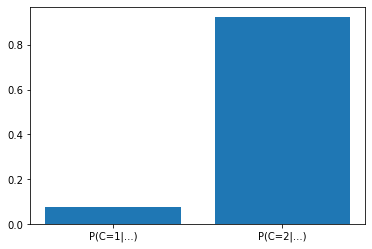

In [6]:
nheads = 5; ntails = 15;
plt.bar(["P(C=1|...)", "P(C=2|...)"] , calculatePosterior(0.5, 0.5, 0.2, nheads, ntails)); plt.show();

# Probabilistic inference $P(Query|Evidence)$

Probabilistic inference in a nutshell: $P(Query|Evidence)$


For example, $P(C|Y_1 = h, Y_2 =h)$
* Query: $\{C\}$: coin choice
* Evidence: $\{Y_1, Y_2\}$, i.e. both tosses are heads

Inference with **nuiance** or **hidden** r.v.: $P(Y_2|Y_1 = h)$
* Query:s $\{Y_2\}$
* Evidence: $\{Y_1\}$

* **Nuisance**, or **hidden** r.v. $\{C\}$, all the other r.v. except $Query$ and $Evidence$ : $\{C, Y_1, Y_2\}/\{Y_1, Y_2\}$
* we need to use sum rule to sum them out (so called nuiance r.v.)
$$\begin{align}P(Y_2|Y_1) &= \sum_c P(Y_2, C=c|Y_1) = \sum_c P(Y_2|C=c, Y_1) P(C=c|Y_1) \\
&= \sum_c \underbrace{P(Y_2|C=c)}_{\text{CI assumption!}} P(C=c|Y_1)\end{align}$$
* it makes perfect sense: to make prediction, we need to consider both possible but hidden coin choices and weight them accordingly (the weights are $P(C|Y_1)$)

## How to specify the probability model

The probability model $P(X_1, X_2, \ldots, X_n)$ can be specified by either

1. fully specify the joint distribution: **not practical** in real world applications
  * need $O(2^n)$ number of rows or entries (assuming all r.v. are binary)

2. or simplied by making conditional independence assumption
  * CI usually encodes some causal relations
  * e.g. given knowing the coin of choice, the tosses are independent
  $$P(C, Y_1, Y_2, \ldots)= P(C) \prod P(Y_i|C)$$
    * we only need 3 parameters for this example rather than ($2^n-1$); namely $P(C),P(Y_i|C=1), P(Y_i|C=2)$ 
    * note that we only need one parameter for each distribution as the outcome is binary and the sum needs to be one e.g. $P(C=2) = 1- P(C=1)$

# More examples of inference and applying Baye's rule

A classic example of applying Baye's rule: 

You are tested positive for COVID by rapid antigen test, with an sensitity of $79\%$ (some call it accuracy) and specificity $98\%$. Assume you live in the UK, how likely you are really infected with COVID? 
  * *sensitivity*: the probability of detecting the disease when there is one
  * _specificity_: "how well does it detect the absence of disease"

Firstly, identify the random variables, 
  * $T = \{0, 1\}$: testing result is negative (0) or positive (1)
  * $C = \{0, 1\}$: you are truely infected by COVID

Secondly, specify the model $P(C, T)$, essentially to decide which way to apply chain rule 

$$P(C,T) = P(C)P(T|C)\;\; \text{or} \;\; P(C,T)= P(T)P(C|T)$$
  1. Consider the "generating process"; we need the the causal relationship, obviously
  $$C \Rightarrow T$$ i.e. a test result depends on whether you got the disease or not, and we know 
  $$P(T=1|C=1) = 0.79$$
    * *sensitivity*: the probability of detecting the disease when there is one
  $$P(T=0|C=0) = 0.98$$ 
    * _specificity_: "how well does it detect the absence of disease"
 
  2. then $P(C, T) = P(C)P(T|C)$, we still need to specify the prior $P(C)$
    * $P(C=1) = 0.02$: the prior probability that a person is infected with COVID in UK
      * I used the currect active case number (1.33 million)/the total UK population (67.22 millon) (https://www.worldometers.info/coronavirus/country/uk/)
      * or random pick one from the UK now, the chance he has COVID

Lastly, do the inference, we are interested in the posterior $$P(C|T=1)$$

  * Apply Baye's rule

$$P(C=0|T=1) \propto P(C=0)P(T=1|C=0)= (1-0.02) * (1-0.98) = 0.0196,\;\; \\
P(C=1|T=1) \propto P(C=1)P(T=1|C=1)= 0.02 * 0.79 = 0.0158$$
  * $P(C|T=1) = \begin{cases}\frac{0.0196}{0.0196+0.0158} = 55.4\%, & C=0 \\ \frac{0.0158}{0.0196+0.0158} =44.6\%, & C=1 \end{cases}$
  
  
So you only have $44.6\%$ chance to really infected with COVID given a positive rapid test result.

That's why you usually will be given another confirming PCR (lab) test (gold standard) to confirm.  

Exercise: how likely you are infected after a confirming PCR positive result ? 
What if the confirming result is negative ? 

Assume a PCR test has sensitivity of 90\% and specificity of 99.8\%.

  * what r.v.s are there ?
  * any conditional independence assumption you can make ?
  * what are the parameters ? 

# Bayesian concept learning

An interesting example of applying **Bayesian inference** to replicate human's **concept learning** process. 

Human are good at summarising or learning concepts from examples. Suppose, you are given a bunch of numbers between 1 and 100:

* if the data are $\{2,4,6,8,10\}$,  you may deduce the _concept_ is **even numbers**, 
  * then you may predict the next observation is $12 \ldots$
* if the data are $\{15, 20, 25\}$, you may deduce the _concept_ is **multiples of 5**,
  * then you may predict the next is e.g. $50$
* if the data is $\{16\}$, you may deduce the _concept_ is **power of 4** or **multiples of 4** or **even** number
  * so you may predict the next is again $64$ or maybe $20, 24$ or $18,\ldots$.
  * not likely you would predict e.g. 3



## Prediction made by human (averaged over 8 humans)

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/josh-5-5.png" width = "1200" height="1000"/></center>

The question: can we **train** a machine to **learn the concepts** and **make predictions** like humans ?
  * i.e. feed observations to a machine, ask the machine learn the **concept** correctly ?
  * it turns out machine can learn concept well by using a simple model

## Probabilistic model for concept learning

We adopt a simple model on the following r.v. $H$ and $\mathcal{D}$
  * $H$: hypothesis or concepts
    * e.g. $h_{\text{two}} \triangleq \text{"power of two"}$, $h_{\text{even}} \triangleq \text{"even numbers"}$
    * so $h \in \{h_{\text{even}}, h_{\text{odd}}, h_{\text{square}}, h_{\text{two}}, h_{\text{three}}, h_{\text{all}}, \ldots\}$
  * $\mathcal{D}$ is the observations, say $\mathcal{D} = \{16, 2, 8\}$  

We need to specify the joint distribution: $P(H, \mathcal{D})$
1. specify P by chain rule: $P(H, \mathcal{D}) = P(H) P(\mathcal{D}|H)$
  * causal relationship: $H \Rightarrow \mathcal{D}$
  * easier than the other way around 
2. assume conditional independent assumption over $\mathcal{D}$ given $h$, i.e.
$$P(\mathcal{D}|h) = P(d_1, d_2, \ldots, d_N|h)= \prod_{i=1}^N P(d_i|h)$$
  * reasonable assumption, given knowing the concept, previous observations no longer influence the later

### The parameters for $P(h)$ and $P(D|h)$

For prior $P(H=h), h\in \{h_{\text{two}}, h_{\text{even}}, h_{\text{odd}}, h_{\text{three}}, h_{\text{all}}, \ldots\}$,
* due to igorance, we can simply use largely uniform prior over concepts of: square, multiples, powers
* but assign higher probability to some common concepts, say $h_{\text{even}}, h_{\text{odd}}$
* and penalise some very rare concepts, say $h_\texttt{powers of 2+\{37\}}$, $h_\texttt{powers of 2-\{32\}}$

We use a uniform distributed likelihood for $P(d_i|h)$: $$P(d_i|h) = \begin{cases}\left[\frac{1}{\text{size}(h)}\right], & \text{if}\; d_i \in h \\ 0 & \text{otherwise}\end{cases}$$

* $\text{size}(h)$ is the size of qualifying set of the concept
  * e.g. $h_{\text{even}} = \{2,4,6,\ldots, 100\}$, $\text{size}(h_{\text{even}}) = 50$
  * $h_{\text{end in 9}} = \{9,19,29,\ldots, 99\}$, $\text{size}(h_{\text{even}}) = 10$
* therefore, $$P(\{16\}|h_{\text{even}}) = 1/50, P(\{16\}|h_{\text{power of 4}}) = 1/3, P(\{16\}|h_{\text{end in 9}}) = 0, $$  
  $$P(\{16, 8, 2, 64\}|h_{\text{even}}) = (1/50)^4, P(\{16, 8, 2, 64\}|h_{\text{power of 4}}) = 0$$  

# Concept inference by Baye's rule with $\mathcal{D}=\{16\}$

Baye's rule: $$P(H|\mathcal{D}) \propto \underbrace{P(H)}_{\text{prior}} \underbrace{P(\mathcal{D}|h)}_{\text{Likelihood}}$$

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/joshPriorLikPost16.png" width = "800" height="400"/></center>

# Concept inference by Baye's rule with $\mathcal{D}=\{16,8,2,4\}$

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/joshPriorLikPostAll.png" width = "800" height="400"/></center>

# Bayesian predictive distribution (not examinable)

We also want to predict future observations:

$$P(d_{N+1} |\mathcal{D})$$

* conditional on the observation so far, the posterior distribution over a future observation $d_{N+1}$


Use the two rules: sum and chain rule

$$P(d_{N+1} |\mathcal{D}) = \sum_{h} P(d_{N+1},h|\mathcal{D}) = \sum_{h} P(d_{N+1}|h,\mathcal{D})P(h|\mathcal{D})$$

We further apply conditional independent assumption

$$P(d_{N+1}|h,\mathcal{D}) = P(d_{N+1}|h)$$

Combined the above we have 

$$P(d_{N+1} |\mathcal{D}) = \sum_{h} P(d_{N+1}|h)P(h|\mathcal{D})$$

* a weighted average over $P(d_{N+1}|h)$
* weights are $P(h|\mathcal{D})$

# Bayesian predictive distribution on $\mathcal{D}=\{16\}$

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/joshPredictive16.png" width = "1200" height="1000"/></center>

# Machine's prediction on concept learning based on Bayesian inference

Compare with human's prediction (left), machine's prediction (right) is pretty much indistinguishable !

Human's prediction         |  Machine's prediction 
:-------------------------:|:-------------------------:
![](https://leo.host.cs.st-andrews.ac.uk/figs/josh-5-5.png)  |  ![](https://leo.host.cs.st-andrews.ac.uk/figs/josh-5-6.png)

# Summary

* Using joint probability distribution
  * contains all the information we need 
  * but not practical: too many parameters
  
* Conditional independence
  * simplifies the joint distribution
   $P(\mathcal{D}|H=h) = \prod P(d|H=h)$ 
  
* Inference is inverse engineering
  * specify the distribution (generating process): by using chain rule and CI assumption
  $$P(\mathcal{D},H) = P(H) P(\mathcal{D}|H)$$
  * inference is doing the reverse engineering: given the observation what are the unknowns (by Baye's rule)
  $$P(H=h|\mathcal{D})\propto P(H=h) P(\mathcal{D}|H=h)$$